In [162]:
%matplotlib notebook
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [91]:
DEATH_BY_COV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
CASES_COV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [5]:
def data_preparation(url):
    """
    Function to prepare the data to be analyzed.
    """
    data_df = pd.read_csv(url)
    colums_exclud = data_df.columns[[0, 2, 3]]
    data_df.drop(colums_exclud,
                 axis=1,
                 inplace=True)
    data_df = data_df.set_index("Country/Region")
    data_df = data_df.groupby(level=0).sum()
    return data_df


In [107]:
def data_country(cases_table, death_table, country):
    """
    Function to create a matrix with data of confirmed cases of COVID-19 and death by COVID-19.
    The first column is data-times, the second column is confirmed cases of COVID-19, and the
    third column is deaths by COVID-19.
    PARAMETERS
    ----------
    data_table: DataFrame with cases
    death_table: DataFrame with deaths
    country: Country to analize
    """
    data_cases = cases_table.loc[country]
    data_death = death_table.loc[country]
    data_array = np.c_[data_cases.index,
                       data_cases.values,
                       data_death.values]
    return data_array

In [110]:
data_country(cases_table=cases_df, death_table=death_df, country="Brazil")

array([['1/22/20', 0, 0],
       ['1/23/20', 0, 0],
       ['1/24/20', 0, 0],
       ['1/25/20', 0, 0],
       ['1/26/20', 0, 0],
       ['1/27/20', 0, 0],
       ['1/28/20', 0, 0],
       ['1/29/20', 0, 0],
       ['1/30/20', 0, 0],
       ['1/31/20', 0, 0],
       ['2/1/20', 0, 0],
       ['2/2/20', 0, 0],
       ['2/3/20', 0, 0],
       ['2/4/20', 0, 0],
       ['2/5/20', 0, 0],
       ['2/6/20', 0, 0],
       ['2/7/20', 0, 0],
       ['2/8/20', 0, 0],
       ['2/9/20', 0, 0],
       ['2/10/20', 0, 0],
       ['2/11/20', 0, 0],
       ['2/12/20', 0, 0],
       ['2/13/20', 0, 0],
       ['2/14/20', 0, 0],
       ['2/15/20', 0, 0],
       ['2/16/20', 0, 0],
       ['2/17/20', 0, 0],
       ['2/18/20', 0, 0],
       ['2/19/20', 0, 0],
       ['2/20/20', 0, 0],
       ['2/21/20', 0, 0],
       ['2/22/20', 0, 0],
       ['2/23/20', 0, 0],
       ['2/24/20', 0, 0],
       ['2/25/20', 0, 0],
       ['2/26/20', 1, 0],
       ['2/27/20', 1, 0],
       ['2/28/20', 1, 0],
       ['2/29/20', 2,

<IPython.core.display.Javascript object>


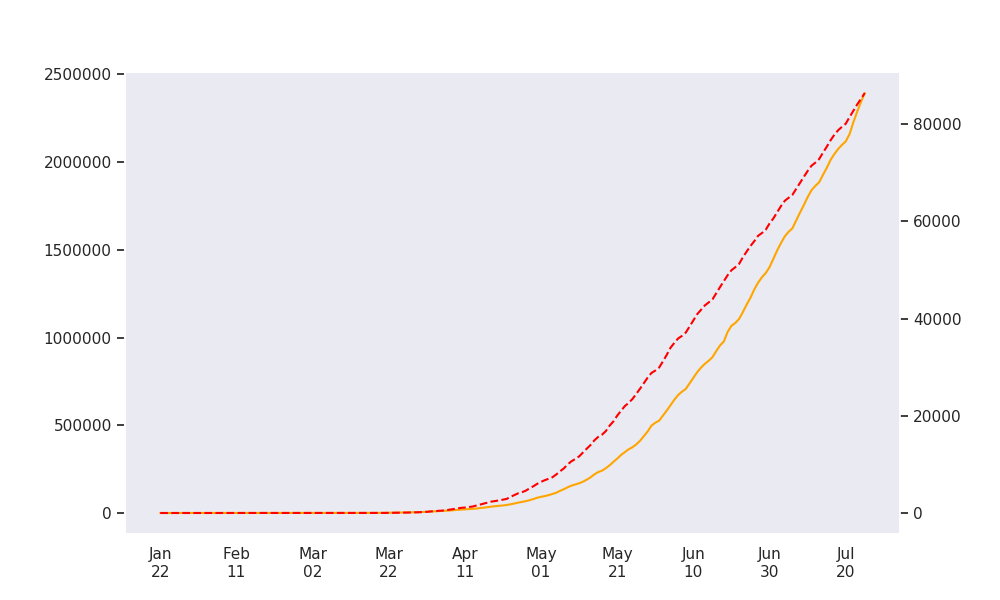

In [164]:
# def country_plot(country, subplot=True, save=False)
# sns.set_style("dark")
country = "Brazil"


labels = "Cases Deaths".split(" ")
colors = "orange red".split(" ")
linestyle = "- --".split(" ")

data_df = data_country(cases_table=cases_df, death_table=death_df, country=country)
date_time = np.array(list(map(lambda x: datetime.strptime(x, "%m/%d/%y"),
                              data_df[:, 0])))
cases = data_df[:, 1]
deaths = data_df[:, 2]

fig, ax = plt.subplots(figsize=(10, 6))
ax_death = ax.twinx()

ax.plot(date_time,
        cases,
        label=f"COVID-19 cases {country}",
        ls=linestyle[0],
        color=colors[0])
ax_death.plot(date_time,
              deaths,
              label=f"COVID-19 deaths {country}",
              ls=linestyle[1],
              color=colors[1])

data_ticks = date_time[np.arange(0,
                                len(date_time),
                                20)]
ax.set_xticks(data_ticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%d'))


In [145]:
ls[0]


['-', '--']

In [136]:
from datetime import datetime
print(date_time)
np.array(list(map(lambda x: datetime.strptime(x, "%m/%d/%y"), date_time)))



['1/22/20' '1/23/20' '1/24/20' '1/25/20' '1/26/20' '1/27/20' '1/28/20'
 '1/29/20' '1/30/20' '1/31/20' '2/1/20' '2/2/20' '2/3/20' '2/4/20'
 '2/5/20' '2/6/20' '2/7/20' '2/8/20' '2/9/20' '2/10/20' '2/11/20'
 '2/12/20' '2/13/20' '2/14/20' '2/15/20' '2/16/20' '2/17/20' '2/18/20'
 '2/19/20' '2/20/20' '2/21/20' '2/22/20' '2/23/20' '2/24/20' '2/25/20'
 '2/26/20' '2/27/20' '2/28/20' '2/29/20' '3/1/20' '3/2/20' '3/3/20'
 '3/4/20' '3/5/20' '3/6/20' '3/7/20' '3/8/20' '3/9/20' '3/10/20' '3/11/20'
 '3/12/20' '3/13/20' '3/14/20' '3/15/20' '3/16/20' '3/17/20' '3/18/20'
 '3/19/20' '3/20/20' '3/21/20' '3/22/20' '3/23/20' '3/24/20' '3/25/20'
 '3/26/20' '3/27/20' '3/28/20' '3/29/20' '3/30/20' '3/31/20' '4/1/20'
 '4/2/20' '4/3/20' '4/4/20' '4/5/20' '4/6/20' '4/7/20' '4/8/20' '4/9/20'
 '4/10/20' '4/11/20' '4/12/20' '4/13/20' '4/14/20' '4/15/20' '4/16/20'
 '4/17/20' '4/18/20' '4/19/20' '4/20/20' '4/21/20' '4/22/20' '4/23/20'
 '4/24/20' '4/25/20' '4/26/20' '4/27/20' '4/28/20' '4/29/20' '4/30/20'
 '5/1/20' '5/

array([datetime.datetime(2020, 1, 22, 0, 0),
       datetime.datetime(2020, 1, 23, 0, 0),
       datetime.datetime(2020, 1, 24, 0, 0),
       datetime.datetime(2020, 1, 25, 0, 0),
       datetime.datetime(2020, 1, 26, 0, 0),
       datetime.datetime(2020, 1, 27, 0, 0),
       datetime.datetime(2020, 1, 28, 0, 0),
       datetime.datetime(2020, 1, 29, 0, 0),
       datetime.datetime(2020, 1, 30, 0, 0),
       datetime.datetime(2020, 1, 31, 0, 0),
       datetime.datetime(2020, 2, 1, 0, 0),
       datetime.datetime(2020, 2, 2, 0, 0),
       datetime.datetime(2020, 2, 3, 0, 0),
       datetime.datetime(2020, 2, 4, 0, 0),
       datetime.datetime(2020, 2, 5, 0, 0),
       datetime.datetime(2020, 2, 6, 0, 0),
       datetime.datetime(2020, 2, 7, 0, 0),
       datetime.datetime(2020, 2, 8, 0, 0),
       datetime.datetime(2020, 2, 9, 0, 0),
       datetime.datetime(2020, 2, 10, 0, 0),
       datetime.datetime(2020, 2, 11, 0, 0),
       datetime.datetime(2020, 2, 12, 0, 0),
       datetime.dat

In [102]:
cases_df = data_preparation(url=CASES_COV)
death_df = data_preparation(url=DEATH_BY_COV)

In [105]:
death_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1113,1147,1164,1181,1185,1186,1190,1211,1225,1248
Albania,0,0,0,0,0,0,0,0,0,0,...,104,107,111,112,113,117,120,123,128,134
Algeria,0,0,0,0,0,0,0,0,0,0,...,1052,1057,1068,1078,1087,1100,1111,1124,1136,1146
Andorra,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
Angola,0,0,0,0,0,0,0,0,0,0,...,28,29,29,29,29,30,33,33,35,39
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
Argentina,0,0,0,0,0,0,0,0,0,0,...,2112,2178,2220,2260,2373,2490,2588,2702,2807,2893
Armenia,0,0,0,0,0,0,0,0,0,0,...,607,620,631,641,650,662,678,688,692,700
Australia,0,0,0,0,0,0,0,0,0,0,...,116,118,122,123,126,128,133,139,145,155


In [106]:
cases_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036
Albania,0,0,0,0,0,0,0,0,0,0,...,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637
Algeria,0,0,0,0,0,0,0,0,0,0,...,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764
Andorra,0,0,0,0,0,0,0,0,0,0,...,877,880,880,880,884,884,889,889,897,897
Angola,0,0,0,0,0,0,0,0,0,0,...,607,638,687,705,749,779,812,851,880,916
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,74,76,76,76,76,76,76,76,82,82
Argentina,0,0,0,0,0,0,0,0,0,0,...,114783,119301,122524,126755,130774,136118,141900,148027,153520,158334
Armenia,0,0,0,0,0,0,0,0,0,0,...,33559,34001,34462,34877,34981,35254,35693,36162,36613,36996
Australia,0,0,0,0,4,5,5,6,9,9,...,11233,11441,11802,12069,12428,12894,13302,13595,13950,14403
